In [2]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
iris = datasets.load_iris()

In [14]:
iris.keys()

dict_keys(['data', 'feature_names', 'DESCR', 'target_names', 'target'])

In [9]:
model = KMeans(n_clusters=3)

In [10]:
model.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
labels = model.predict(iris.data)

In [29]:
xs = iris.data[:,0]
ys = iris.data[:,2]

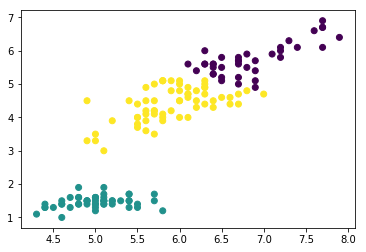

In [30]:
plt.scatter(xs, ys, c=labels)

In [39]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [35]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [36]:
df = pd.DataFrame({'labels': labels, 'species': iris.target})

In [37]:
ct = pd.crosstab(df['labels'], df['species'])

In [38]:
print(ct)

species   0   1   2
labels             
0         0   2  36
1        50   0   0
2         0  48  14


In [44]:
clusters = range(1,10)
inertias = []

In [45]:
for cluster in clusters:
    model = KMeans(n_clusters=cluster)
    model.fit(iris.data)
    inertias.append(model.inertia_)

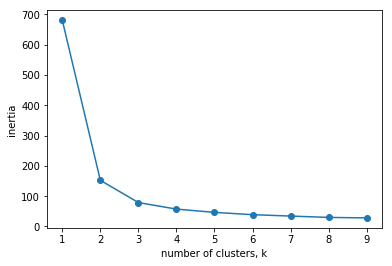

In [46]:
plt.plot(clusters, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(clusters)
plt.show()